# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Vincent Jestaedt

Datum: 22.11.23

Gruppe: 14

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Welchen Wert für den Koeffizienten des Newtonschen Abkühlungsgesetzes kann man im Küchentischversuch ermitteln?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/Newton.jpeg" width="800">

Es wird 250ml kochendes Wasser in eine Tasse gekippt und das Abkühlungsverhalten wird beobachtet.

## Versuchsauswertung

In [11]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
import h5py
import matplotlib.pyplot as plt
import numpy as np

file_path = "calorimetry_home.h5"
hdf5_file = h5py.File(file_path, "r")


# DONE #

In [13]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

#Zugriff auf die Daten der Sensoren
sensor_1_temperature = hdf5_file["RawData/3ce1045763bf/Temperatur"]
sensor_2_temperature = hdf5_file["RawData/3ce1045712e2/Temperatur"]

#Zugriff auf den Zeitstempel der Sensoren
sensor_1_timestamps = hdf5_file["RawData/3ce1045763bf/Zeit"]
sensor_2_timestamps = hdf5_file["RawData/3ce1045712e2/Zeit"]

#Umwandeln der Zeitstempel-Daten in NumPy-Arrays
sensor_1_timestamp_array = np.array(sensor_1_timestamps)
sensor_2_timestamp_array = np.array(sensor_2_timestamps)

#Umwandeln der Temperatur-Daten in NumPy-Arrays
sensor_1_temperature_array = np.array(sensor_1_temperature)
sensor_2_temperature_array = np.array(sensor_2_temperature)

#Bilden der Differenz beider Temperaturen
temperature_difference = sensor_1_temperature_array - sensor_2_temperature_array
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

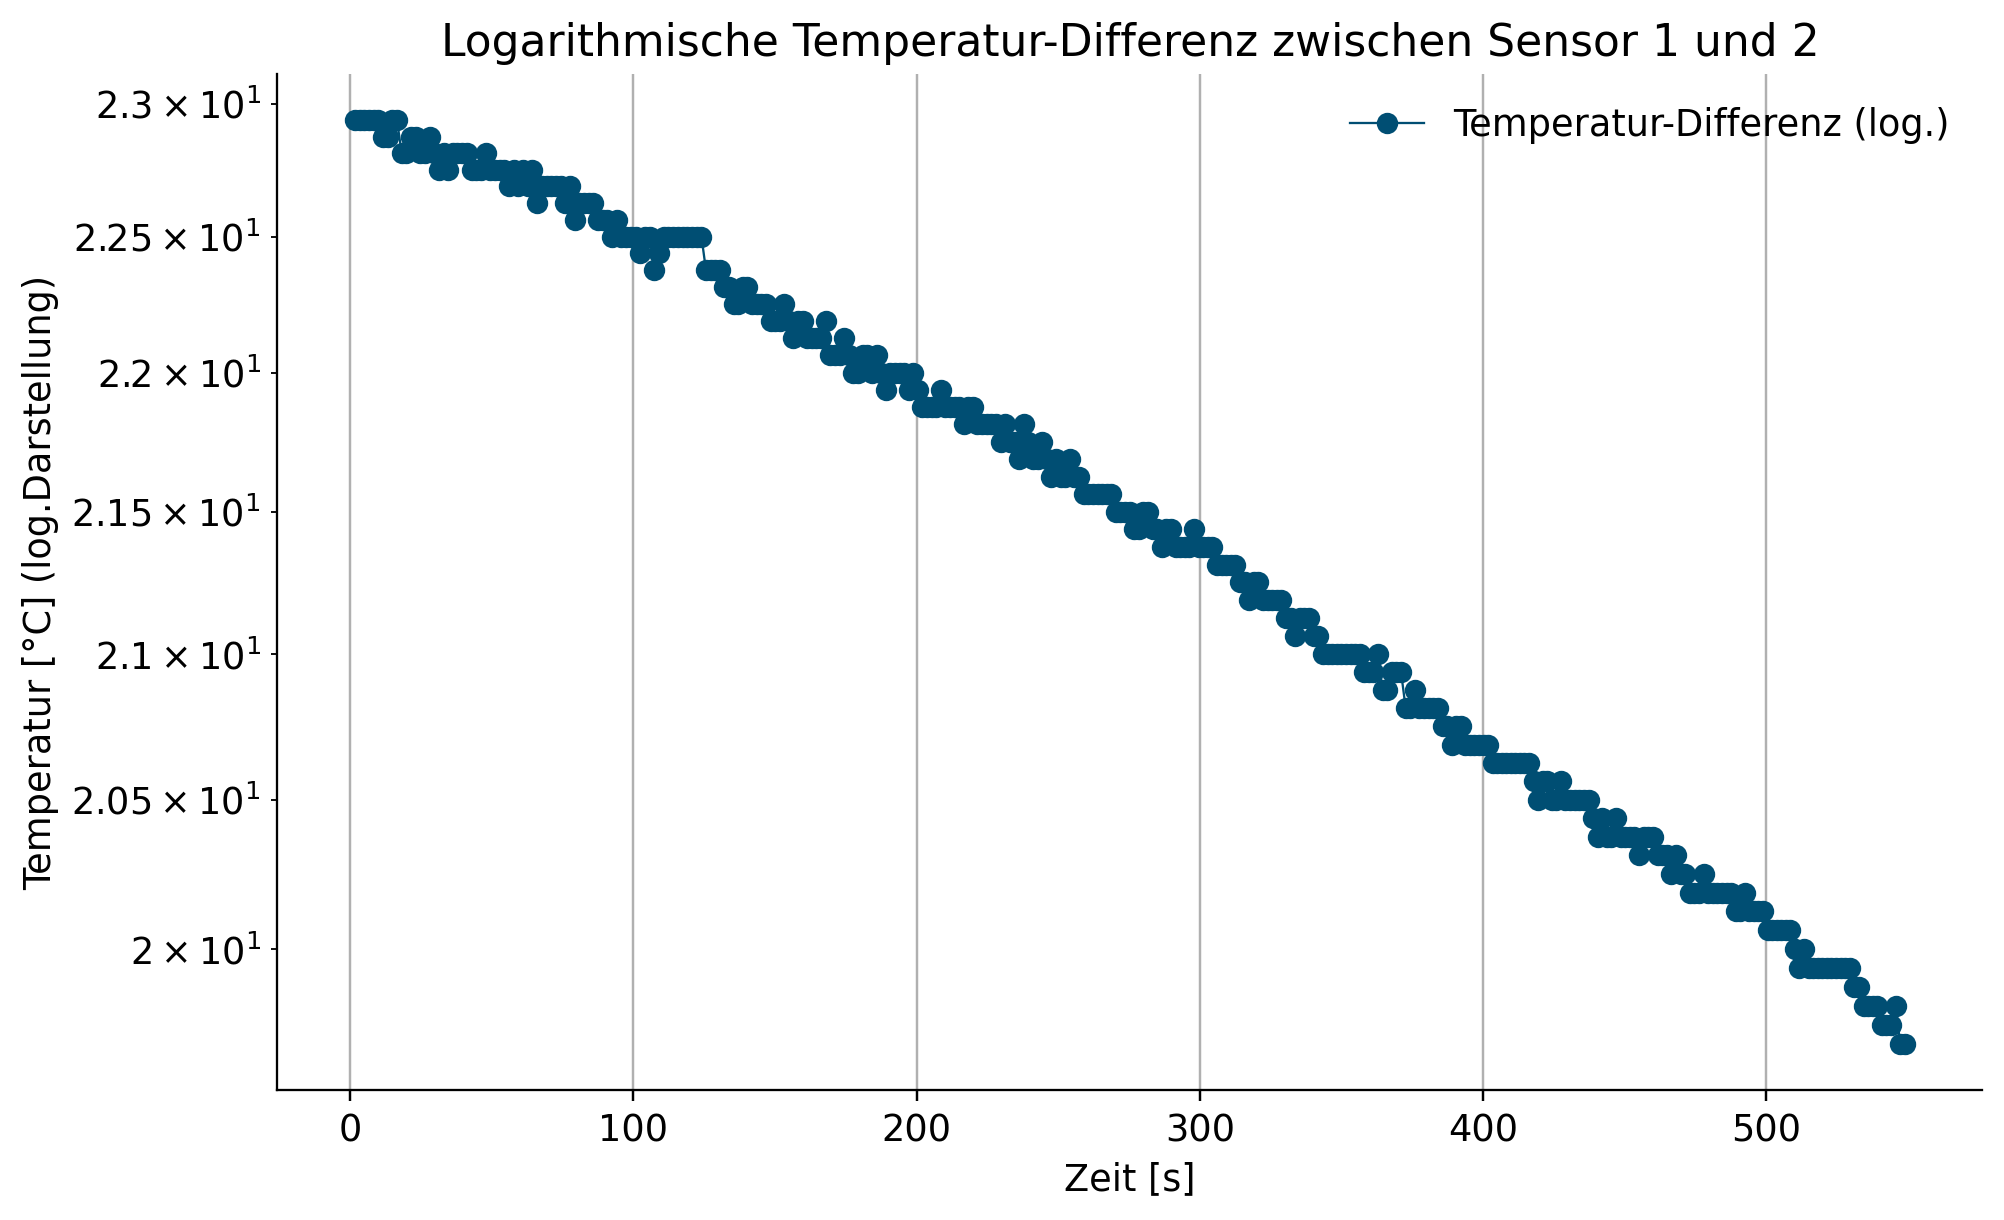

In [14]:
# TODO: Use the temperature and time data for plotting

#Erzeugen eines Diagramms
plt.figure(figsize=(10, 6))

#Darstellen des log. Diagramms
plt.semilogy(sensor_1_timestamp_array, temperature_difference, label="Temperatur-Differenz (log.)", linestyle='-',marker='o')


#Beschriftungen des Diagramms
plt.xlabel("Zeit [s]")
plt.ylabel("Temperatur [°C] (log.Darstellung)")
plt.title("Logarithmische Temperatur-Differenz zwischen Sensor 1 und 2")
plt.legend()
plt.grid(True)
plt.show()


# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [15]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
import numpy as np 
temperature_difference = sensor_1_temperature_array - sensor_2_temperature_array
#Auslesen der gesuchten Temperaturen
T1 = sensor_1_temperature_array[0]
T2 = sensor_1_temperature_array[-1]

#Berechnung der Temperaturdifferenzen und Verhindern einer Ziehung des Logarithmus von einer Null
epsilon = 1e-10
ln_temperature_diff = np.log(np.maximum(temperature_difference - T2 + epsilon, epsilon))
ln_T1_minus_T2 = np.log(np.maximum(T1 - T2 + epsilon, epsilon))
#Bestimmung des Koeffizienten K 
t_values = sensor_1_timestamps
coefficients = np.polyfit(t_values, ln_temperature_diff, 1)
K = coefficients[0]


#Schließen der HDF5 Datei
hdf5_file.close()


# DONE #

#### (iV) Ergebnis

In [16]:
# TODO: Print result
#Ausgabe des Koeffizienten
print("Koeffizient K:", K)
# DONE #

Koeffizient K: -3.8891895046929883e-17


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Dieser Koeffizient ist nahezu Null und die logarithmische Temperaturkurve ist nahezu linear. Das Abkühlungsgesetz konnte bestätigt werden. 
Jedoch können Probenverunreinigungen, eine ungenaue Versuchsdurchführung und weitere Messfehler das Ergebnis negativ beeinflusst haben.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Das Versuchsziel wurde erfüllt. Das Gesetz wurde bestätigt und es konnte ein sinnvoller Wert ermittelt werden. 